<a href="https://colab.research.google.com/github/Aliht72/BI-LSTM-CRF-BERT-/blob/main/Bi_Lstm_Crf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-mljezbdn
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-mljezbdn
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=9692b8b63ba11c6f5b62764bfbac7e6a7e0874692428d3e433ac451c3797e954
  Stored in directory: /tmp/pip-ephem-wheel-cache-06wh8i7x/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220719082949.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? 

In [ ]:
!pip install tensorflow==1.13.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 91 kB/s 
     |████████████████████████████████| 367 kB 58.8 MB/s 
     |████████████████████████████████| 3.2 MB 56.7 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.


In [ ]:
!pip uninstall keras

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled keras-2.8.0


In [ ]:
!pip install keras==2.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 19.7 MB/s 


In [ ]:
 !pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.1 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=95b99f5cd445384a1f13f1c21468cdcbd3f189ec345f8f39ed295c758dafd280
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
!pip install sklearn-crfsuite


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 37.5 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
if tf.test.is_gpu_available():
    BATCH_SIZE = 32  # Number of examples used in each iteration
    EPOCHS = 20  # Number of passes through entire dataset
    MAX_LEN = 75  # Max length of review (in words)
    EMBEDDING = 40  # Dimension of word embedding vector
# Hyperparams for CPU training
else:
    BATCH_SIZE = 32
    EPOCHS = 20
    MAX_LEN = 75
    EMBEDDING = 40

In [ ]:
data = pd.read_csv("text123.csv", encoding="latin1")
data = data.fillna(method="ffill")

print("Number of sentences: ", len(data.groupby(['Sentences'])))
words = list(set(data["Word"].values))
n_words = len(words)
print("Number of words in the dataset: ", n_words)
tags = list(set(data["Tag"].values))
print("Tags:", tags)
n_tags = len(tags)
print("Number of Labels: ", n_tags)
print("What the dataset looks like:")
# Show the first 10 rows
data.head(n=10)

Number of sentences:  399
Number of words in the dataset:  1537
Tags: ['B-A', 'B-S', 'B-CR', 'I-A', 'I-QU', 'I-CR', 'O', 'B-Ref', 'I-S', 'B-QU', 'I-Ref']
Number of Labels:  11
What the dataset looks like:


,Word,Sentences,Tag
0,door,Sentence: 1,B-S
1,openings,Sentence: 1,I-S
2,between,Sentence: 1,O
3,a,Sentence: 1,O
4,private,Sentence: 1,B-S
5,garage,Sentence: 1,I-S
6,and,Sentence: 1,O
7,the,Sentence: 1,O
8,dwelling,Sentence: 1,B-S
9,unit,Sentence: 1,I-S


In [ ]:
class SentenceGetter(object):
    """Class to Get the sentence in this format:
    [(Token_1, Part_of_Speech_1, Tag_1), ..., (Token_n, Part_of_Speech_1, Tag_1)]"""
    def __init__(self, data):
        """Args:
            data is the pandas.DataFrame which contains the above dataset"""
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p) for w, p in zip(s["Word"].values.tolist(), s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentences").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        """Return one sentence"""
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
class SentenceGetter(object):
    """Class to Get the sentence in this format:
    [(Token_1, Part_of_Speech_1, Tag_1), ..., (Token_n, Part_of_Speech_1, Tag_1)]"""
    def __init__(self, data):
        """Args:
            data is the pandas.DataFrame which contains the above dataset"""
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p) for w, p in zip(s["Word"].values.tolist(), s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentences").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        """Return one sentence"""
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

getter = SentenceGetter(data)
sent = getter.get_next()
print('This is what a sentence looks like:')
print(sent)
sentences = getter.sentences



This is what a sentence looks like:
[('door', 'B-S'), ('openings', 'I-S'), ('between', 'O'), ('a', 'O'), ('private', 'B-S'), ('garage', 'I-S'), ('and', 'O'), ('the', 'O'), ('dwelling', 'B-S'), ('unit', 'I-S'), ('shall', 'O'), ('be', 'O'), ('equipped', 'O'), ('with', 'O'), ('steel', 'B-S'), ('doors', 'I-S'), ('not', 'B-CR'), ('less', 'I-CR'), ('than', 'I-CR'), ('3499mm', 'B-QU'), ('thick', 'B-A')]


In [ ]:
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding
# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}
# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}
from keras_preprocessing.sequence import pad_sequences# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post", value=word2idx["PAD"])
# Convert Tag/Label to tag_index
y = [[tag2idx[w[1]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])
from keras.utils import to_categorical
# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]  # n_tags+1(PAD)
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape
print('Raw Sample: ', ' '.join([w[0] for w in sentences[0]]))
print('Raw Label: ', ' '.join([w[1] for w in sentences[0]]))
print('After processing, sample:', X[0])
print('After processing, labels:', y[0])


Raw Sample:  door openings between a private garage and the dwelling unit shall be equipped with steel doors not less than 3499mm thick
Raw Label:  B-S I-S O O B-S I-S O O B-S I-S O O O O B-S I-S B-CR I-CR I-CR B-QU B-A
After processing, sample: [1076 1186 1146  620  877 1141  708  626  502  585 1441  481  758  899
  326  299 1200 1009  808  959   32    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
After processing, labels: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

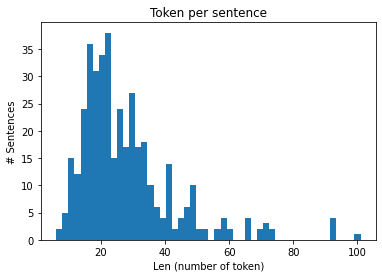

In [ ]:
# Get all the sentences
sentences = getter.sentences

# Plot sentence by lenght
plt.hist([len(s) for s in sentences], bins=50)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# Sentences')
plt.show()

In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF
# Model definition
input = Input(shape=(MAX_LEN,))
model = Embedding(input_dim=n_words+2, output_dim=EMBEDDING, # n_words + 2 (PAD & UNK)
                  input_length=MAX_LEN, mask_zero=True)(input)  # default: 20-dim embedding
model = Bidirectional(LSTM(units=50, return_sequences=True,
                           recurrent_dropout=0.1))(model)  # variational biLSTM
model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
crf = CRF(n_tags+1)  # CRF layer, n_tags+1(PAD)
out = crf(model)  # output
model = Model(input, out)
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])
model.summary()


/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 75, 40)            61560     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 75, 100)           36400     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 75, 50)            5050      
_________________________________________________________________
crf_4 (CRF)                  (None, 75, 12)            780       
Total params: 103,790
Trainable params: 103,790
Non-trainable params: 0
_________________________________________________________________


# New Section

In [ ]:
history = model.fit(X_tr, np.array(y_tr), batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, verbose=2)


Train on 323 samples, validate on 36 samples
Epoch 1/20
 - 4s - loss: 8.3293 - crf_viterbi_accuracy: 0.1708 - val_loss: 7.3601 - val_crf_viterbi_accuracy: 0.4241
Epoch 2/20
 - 2s - loss: 7.7096 - crf_viterbi_accuracy: 0.4097 - val_loss: 7.2175 - val_crf_viterbi_accuracy: 0.4491
Epoch 3/20
 - 2s - loss: 7.6255 - crf_viterbi_accuracy: 0.4262 - val_loss: 7.1395 - val_crf_viterbi_accuracy: 0.4335
Epoch 4/20
 - 2s - loss: 7.5867 - crf_viterbi_accuracy: 0.4414 - val_loss: 7.0925 - val_crf_viterbi_accuracy: 0.4616
Epoch 5/20
 - 2s - loss: 7.5414 - crf_viterbi_accuracy: 0.4557 - val_loss: 7.0635 - val_crf_viterbi_accuracy: 0.3697
Epoch 6/20
 - 2s - loss: 7.4962 - crf_viterbi_accuracy: 0.4630 - val_loss: 7.0136 - val_crf_viterbi_accuracy: 0.4926
Epoch 7/20
 - 2s - loss: 7.4283 - crf_viterbi_accuracy: 0.4941 - val_loss: 6.9149 - val_crf_viterbi_accuracy: 0.4962
Epoch 8/20
 - 2s - loss: 7.3445 - crf_viterbi_accuracy: 0.5272 - val_loss: 6.8173 - val_crf_viterbi_accuracy: 0.5340
Epoch 9/20
 - 2s - 

In [ ]:
BATCH_SIZE

32

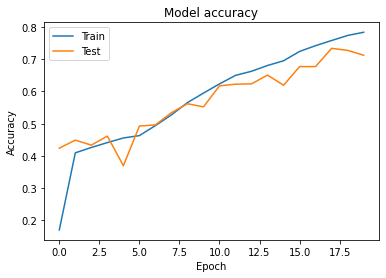

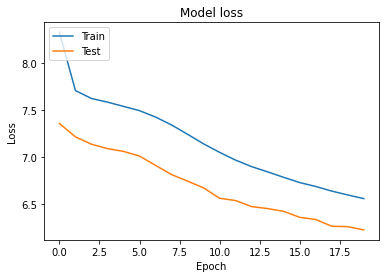

In [ ]:
plt.plot(history.history['crf_viterbi_accuracy'])
plt.plot(history.history['val_crf_viterbi_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:

from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
test_pred = model.predict(X_te, verbose=1)

idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            if idx2tag[p_i]=="PAD":
              break
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

for i in range(len(test_labels)):
  if len(test_labels[i]) != len(pred_labels[i]):
    while len(test_labels[i]) != len(pred_labels[i]):
      pred_labels[i].append('O')


from seqeval.metrics import classification_report

print(classification_report(test_labels, pred_labels))

from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

40/40 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           A       0.93      0.64      0.76        22
          CR       0.69      0.71      0.70        34
          QU       0.90      0.87      0.88        53
         Ref       0.77      0.88      0.82        26
           S       0.81      0.86      0.83       190

   micro avg       0.81      0.83      0.82       325
   macro avg       0.82      0.79      0.80       325
weighted avg       0.82      0.83      0.82       325



ValueError: ignored

In [ ]:
predic=[]
for i in range(0, len(pred_labels)):
  for k in range(0 , len(pred_labels[i])):
    
    predic.append(pred_labels[i][k])
    k+=1
  i+=1
print(predic)

testit=[]
for j in range(0, len(test_labels)):
  for l in range(0 , len(test_labels[j])):
    testit.append(test_labels[j][l])
    l+=1
  j+=1
print(testit)



['O', 'B-CR', 'B-S', 'B-QU', 'O', 'B-S', 'I-S', 'I-S', 'O', 'O', 'O', 'B-S', 'B-S', 'O', 'O', 'O', 'O', 'B-S', 'I-S', 'O', 'B-S', 'O', 'O', 'O', 'B-S', 'O', 'B-S', 'I-S', 'O', 'O', 'O', 'O', 'O', 'B-S', 'O', 'B-S', 'O', 'O', 'B-S', 'B-S', 'O', 'O', 'B-S', 'O', 'O', 'O', 'O', 'B-S', 'O', 'B-QU', 'I-S', 'O', 'O', 'B-S', 'O', 'B-S', 'O', 'B-S', 'O', 'O', 'B-S', 'O', 'B-S', 'B-S', 'O', 'O', 'B-S', 'O', 'B-S', 'O', 'O', 'B-S', 'I-Ref', 'B-S', 'B-S', 'I-Ref', 'B-CR', 'B-S', 'B-QU', 'O', 'O', 'O', 'O', 'B-S', 'B-S', 'O', 'O', 'B-S', 'B-S', 'O', 'O', 'O', 'B-S', 'O', 'B-S', 'O', 'O', 'B-S', 'I-S', 'O', 'O', 'B-S', 'O', 'O', 'O', 'B-S', 'O', 'B-S', 'O', 'O', 'O', 'B-S', 'I-S', 'O', 'I-Ref', 'B-S', 'O', 'O', 'O', 'O', 'O', 'B-S', 'I-S', 'I-S', 'I-S', 'I-S', 'O', 'B-S', 'I-S', 'O', 'O', 'B-S', 'O', 'B-QU', 'B-S', 'B-S', 'O', 'B-S', 'B-S', 'O', 'O', 'B-S', 'I-CR', 'B-QU', 'O', 'B-QU', 'I-CR', 'B-QU', 'O', 'O', 'O', 'O', 'O', 'O', 'B-S', 'O', 'O', 'B-S', 'B-S', 'B-S', 'O', 'O', 'O', 'O', 'B-CR', 'B

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testit, predic))

              precision    recall  f1-score   support

         B-A       0.93      0.64      0.76        22
        B-CR       0.83      0.71      0.76        34
        B-QU       0.90      0.87      0.88        53
       B-Ref       0.93      0.96      0.94        26
         B-S       0.87      0.92      0.90       182
        I-CR       0.78      0.72      0.75        29
        I-QU       1.00      1.00      1.00         7
       I-Ref       0.93      0.99      0.96        90
         I-S       0.90      0.83      0.87       156
           O       0.95      0.97      0.96       488

    accuracy                           0.92      1087
   macro avg       0.90      0.86      0.88      1087
weighted avg       0.92      0.92      0.91      1087



In [ ]:
y_true = []
y_pred = []
for line in test_labels:
  for item in line:
    y_true.append(item)
for line in pred_labels:
  for item in line:
    y_pred.append(item)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_true=y_true, y_pred=y_pred, average='micro')

0.9162833486660533

[[103   5   0   2   0   2  46   0   0  29   2]
 [  0  19   0   0   0   0   9   0   0   5   1]
 [  1   0   1   3   0   1   0   0   0   3   5]
 [  3   0   0  59   0   2   7   0   0   5   4]
 [  0   0   1   4   0   3   0   0   0   0   2]
 [  0   3   0   0   0  17   5   0   0   5   1]
 [  8   5   0   0   0   1 414   0   0  12   0]
 [  0   0   0   0   0   0   0   0   0   0   1]
 [  1   3   0   8   0   3   1   0   2   2   2]
 [ 15   4   0   2   0   1  15   0   2 130   3]
 [  2   0   0   7   0   5   0   0   0   1  25]]


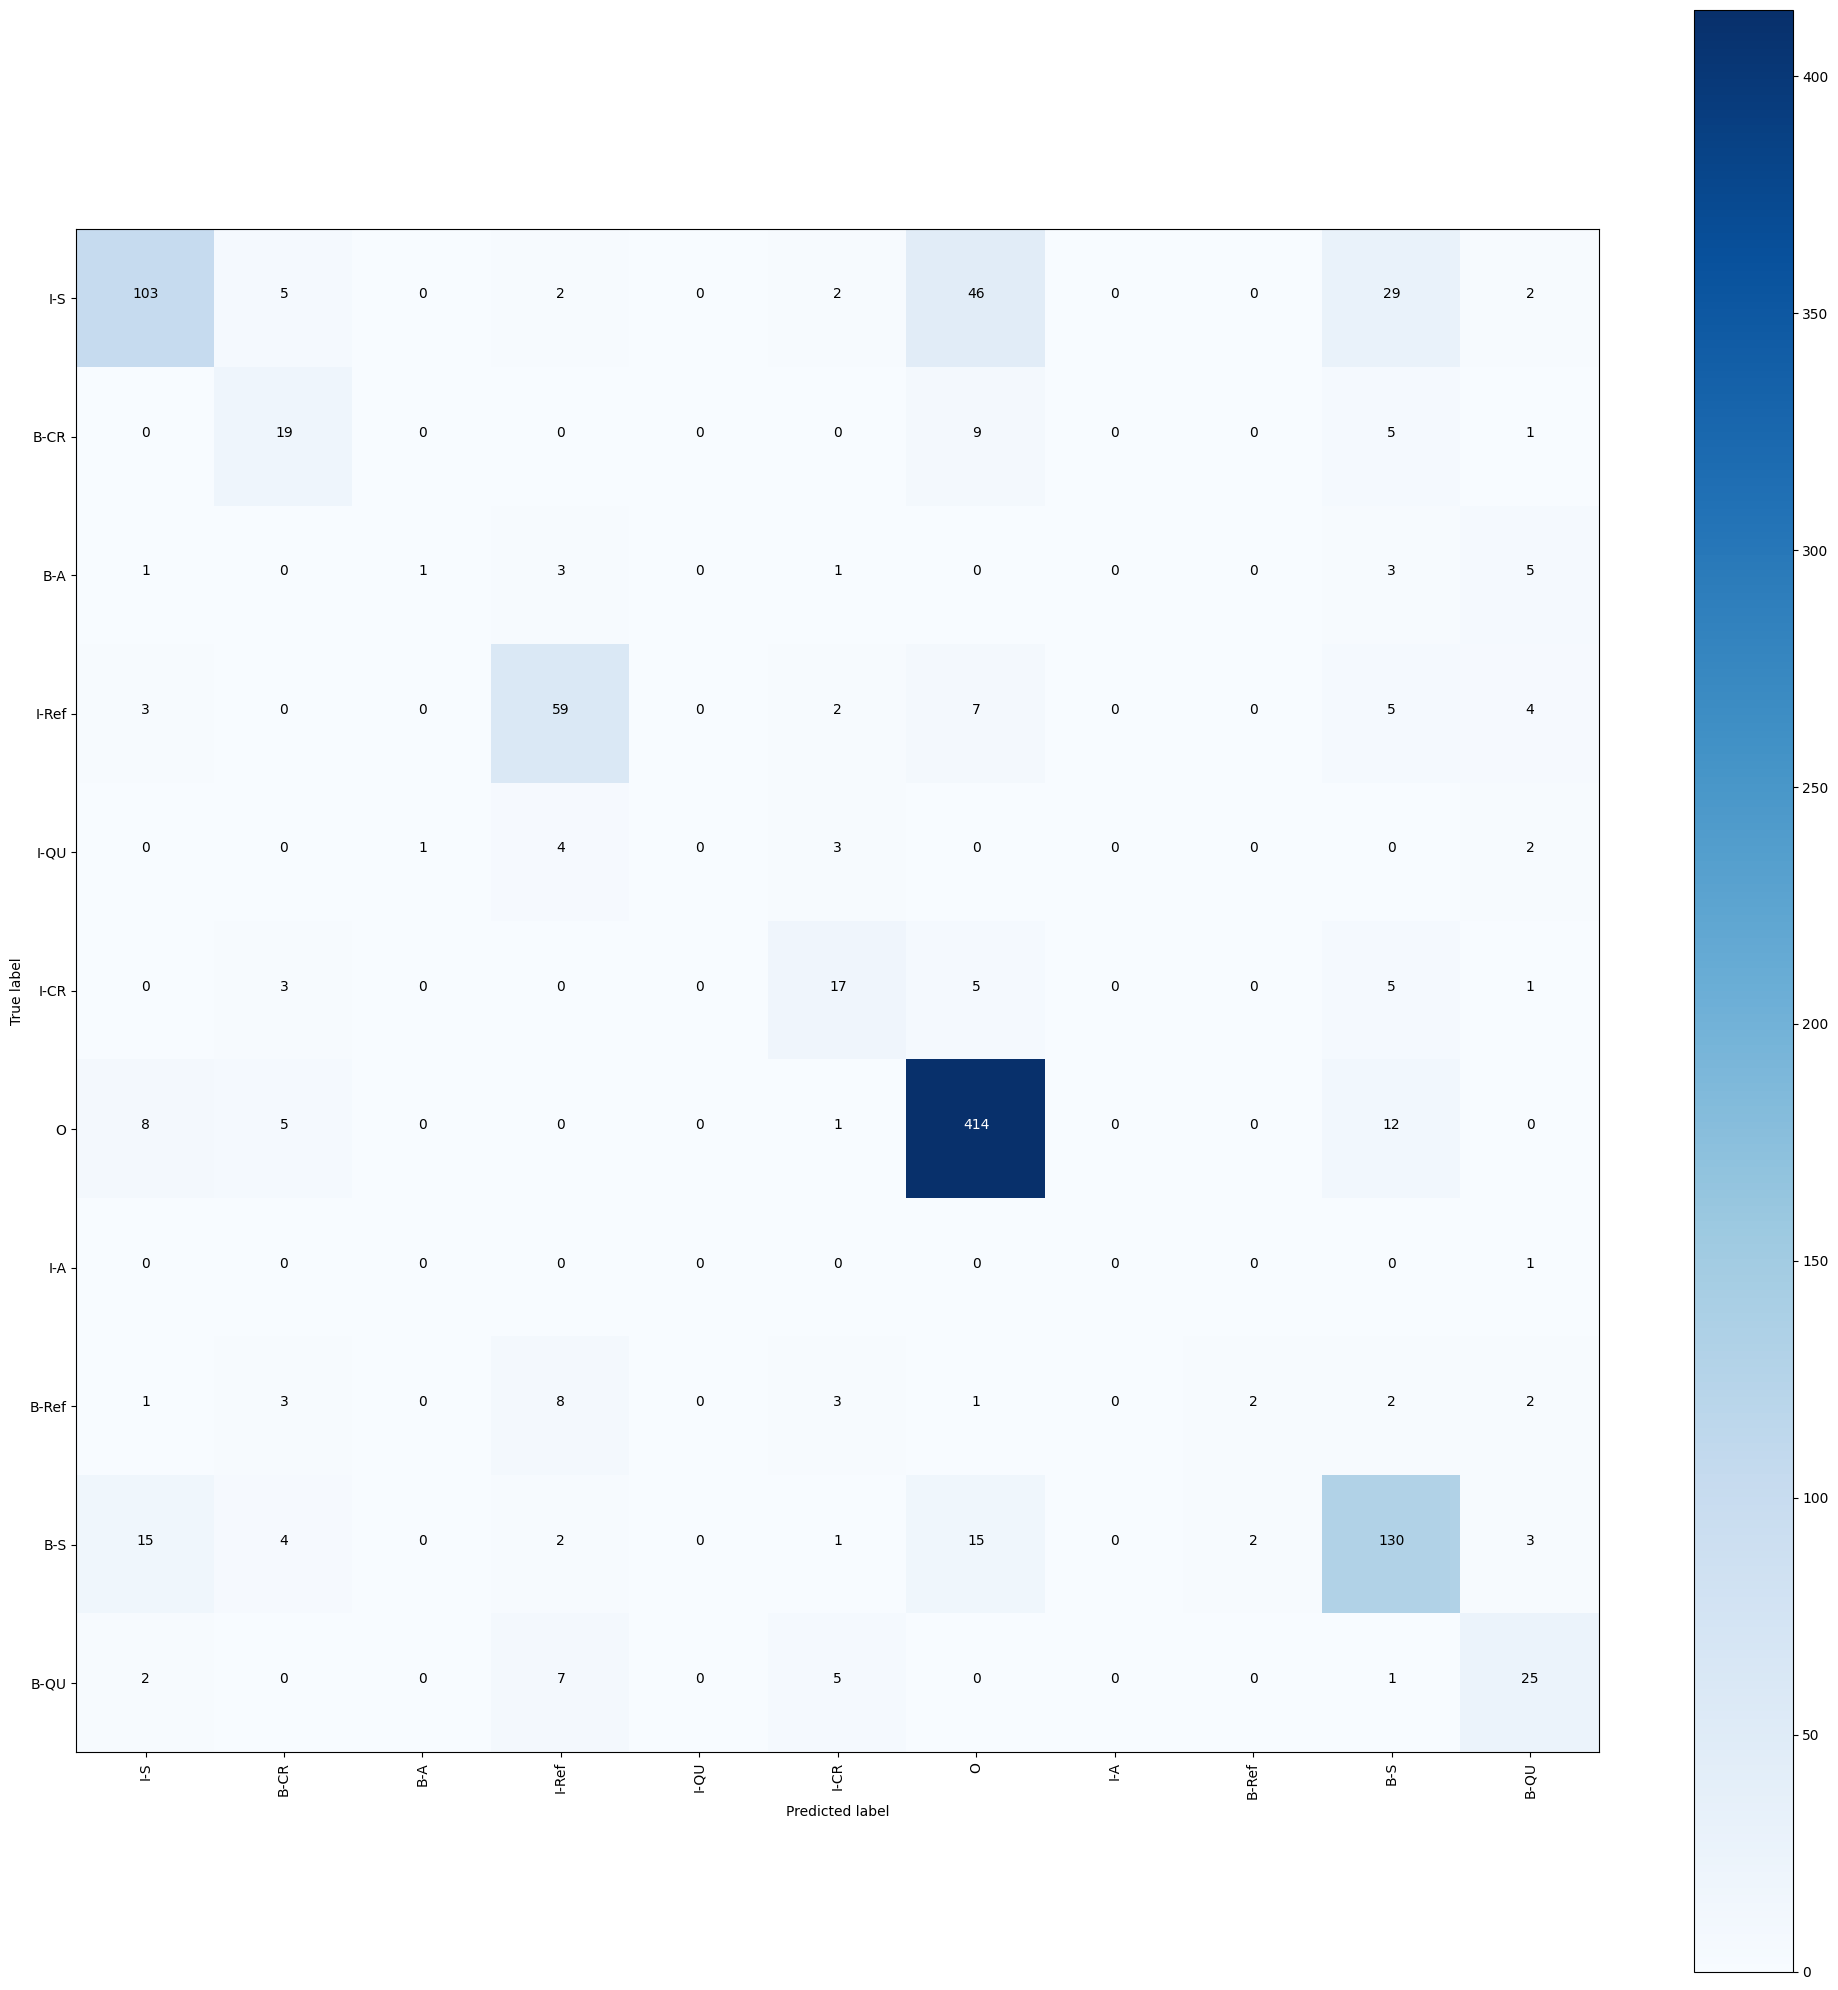

In [ ]:
#confusion matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    print(cm)
    plt.ion()
    plt.figure(num=None, figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
labels = ['I-S', 'B-CR', 'B-A', 'I-Ref', 'I-QU', 'I-CR' , 'O' ,'I-A', 'B-Ref', 'B-S' , 'B-QU']    

cnf_matrix = confusion_matrix(y_true, y_pred,labels=labels)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')

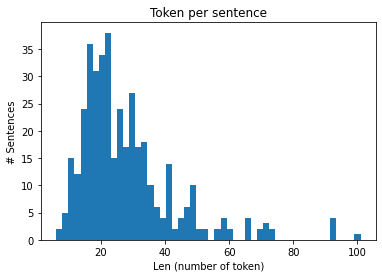

In [ ]:
# Get all the sentences
sentences = getter.sentences

# Plot sentence by lenght
plt.hist([len(s) for s in sentences], bins=50)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# Sentences')
plt.show()


In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['O','S','CR','A','Ref', 'QU' ],
                             values=[5125,3639,622,172,880,622])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.show()